In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [1]:
class Population:
    def __init__(self, N, beta, gamma, mu, crossInfectivity):
        self.N = N
        self.beta = beta
        self.gamma = gamma
        self.mu = mu
        self.crossInfectivity = crossInfectivity
        
        self.S = N - 1
        self.I = 1
        self.R = 0
        self.D = 0
    
    # when two different populations connect, they can infect one another
    def crossInfect(self, population):
        changeI = (self.S * population.crossInfectivity * population.I)
        
        self.S -= changeI
        self.I += changeI
    
    def SIRD(self):
        changeS = -(self.beta * self.S * self.I)/self.N
        changeI = ((self.beta * self.S * self.I)/self.N) - (self.gamma * self.I) - (self.mu * self.I)
        changeR = self.gamma * self.I
        changeD = self.mu * self.I
        
        self.S += changeS
        self.I += changeI
        self.R += changeR
        self.D += changeD
        

In [19]:
group1 = Population(1000, 0.5, 0.1, 0.01, 0.01)

group2 = Population(10000, 0.3, 0.01, 0.01, 0.01)

In [20]:
S = [group1.S + group2.S]
I = [group1.I + group2.I]
R = [group1.R + group2.R]
D = [group1.D + group2.D]

for i in range(100):
    group1.SIRD()
    group2.SIRD()
    
    group1.crossInfect(group2)
    group2.crossInfect(group1)
    
    S.append(group1.S + group2.S)
    I.append(group1.I + group2.I)
    R.append(group1.R + group2.R)
    D.append(group1.D + group2.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

nan


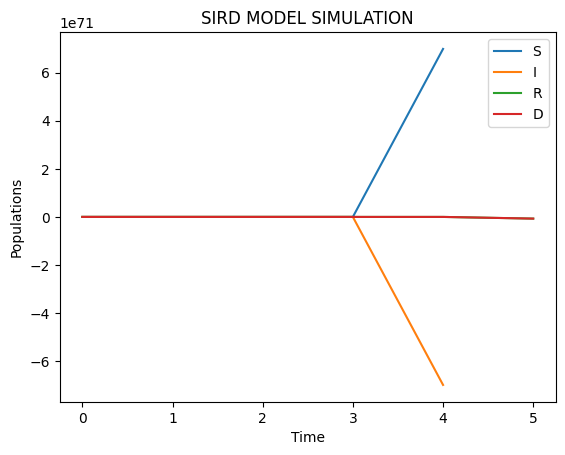

In [21]:
plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD MODEL SIMULATION")
plt.legend()
plt.show()